In [35]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

In [36]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [37]:
X_train = X_train.reshape(-1, 28 * 28).astype(np.float32)
X_test = X_test.reshape(-1, 28 * 28).astype(np.float32)

X_train = X_train / 255
X_test = X_test / 255

In [38]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [64]:
model = Sequential([
    Dense(units=1000, input_dim=784, kernel_initializer="normal", activation="relu"),
    Dropout(0.5),
    Dense(units=1000, kernel_initializer="normal", activation="relu"),
    Dropout(0.5),
    Dense(units=10, kernel_initializer="normal", activation="softmax")
])

In [65]:
print(model.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                10010     
Total params: 1,796,010
Trainable params: 1,796,010
Non-trainable params: 0
_________________________________________________________________
None


In [66]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [67]:
train_history = model.fit(X_train, y_train_onehot, validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 5s - loss: 0.3695 - accuracy: 0.8841 - val_loss: 0.1364 - val_accuracy: 0.9597
Epoch 2/10
 - 4s - loss: 0.1614 - accuracy: 0.9513 - val_loss: 0.1024 - val_accuracy: 0.9690
Epoch 3/10
 - 4s - loss: 0.1226 - accuracy: 0.9625 - val_loss: 0.0898 - val_accuracy: 0.9722
Epoch 4/10
 - 4s - loss: 0.0963 - accuracy: 0.9697 - val_loss: 0.0831 - val_accuracy: 0.9747
Epoch 5/10
 - 4s - loss: 0.0856 - accuracy: 0.9723 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 6/10
 - 4s - loss: 0.0759 - accuracy: 0.9755 - val_loss: 0.0743 - val_accuracy: 0.9785
Epoch 7/10
 - 4s - loss: 0.0652 - accuracy: 0.9791 - val_loss: 0.0765 - val_accuracy: 0.9777
Epoch 8/10
 - 4s - loss: 0.0640 - accuracy: 0.9793 - val_loss: 0.0769 - val_accuracy: 0.9780
Epoch 9/10
 - 4s - loss: 0.0560 - accuracy: 0.9819 - val_loss: 0.0774 - val_accuracy: 0.9779
Epoch 10/10
 - 4s - loss: 0.0545 - accuracy: 0.9826 - val_loss: 0.0704 - val_accuracy: 0.9798


In [56]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train], label="train")
    plt.plot(train_history.history[validation], label="validation")
    plt.title("Train History")
    plt.xlabel("epoch")
    plt.ylabel(train)
    plt.legend(loc="upper left")
    plt.show()

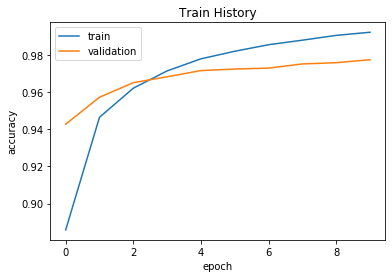

In [57]:
show_train_history(train_history, "accuracy", "val_accuracy")

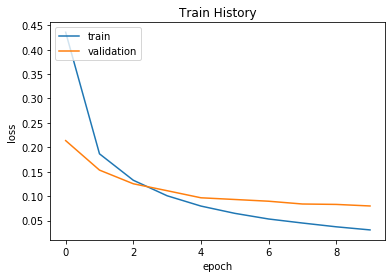

In [58]:
show_train_history(train_history, "loss", "val_loss")

In [47]:
loss, accuracy = model.evaluate(X_test, y_test_onehot)
print(accuracy)

10000/10000 [==============================] - 0s 14us/step
0.9764999747276306


In [48]:
y_predict = model.predict_classes(X_test)

In [49]:
import pandas as pd
pd.crosstab(y_test, y_predict, rownames=["label"], colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,972,1,1,1,0,1,1,1,2,0
1,0,1124,3,1,0,1,2,0,4,0
2,4,1,1010,4,2,0,2,4,5,0
3,1,0,6,993,0,2,0,2,3,3
4,0,1,4,1,959,0,4,1,2,10
5,4,0,0,16,0,859,5,0,6,2
6,5,2,2,1,3,3,939,0,3,0
7,0,6,12,7,0,0,0,994,2,7
8,3,0,3,8,3,1,1,2,951,2


In [50]:
df = pd.DataFrame({"label": y_test, "predict": y_predict})

In [51]:
df.head()

,label,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


In [52]:
df[(df.label == 5) & (df.predict == 3)]

,label,predict
340,5,3
1003,5,3
1393,5,3
2035,5,3
2810,5,3
3117,5,3
3702,5,3
3902,5,3
4271,5,3
4300,5,3
